http://catalog.data.gov/dataset/my-brothers-keeper-key-statistical-indicators-on-boys-and-men-of-color


In [7]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns 

In [8]:
from myxls_stuff import indent

In [9]:
xlsfile = pd.ExcelFile("Child-poverty_Percent-mine.xlsm",encoding='UTF-8')
df0 = xlsfile.parse('Percent', skiprows=1, header=0)
df0.dropna(how='any', inplace=True) # Drop all rows where every row is null.

## Clean
### Convert 'Characteristic' from unicode to ascii

In [10]:
df0['Characteristic'].unique()

array([u'Ages 0\u201317', u'White alone, non-Hispanic',
       u'Black or African American alone, non-Hispanic',
       u'Asian alone, non-Hispanic', u'Other, non-Hispanic', u'Hispanic ',
       u'Ages 0-5', u'Ages 6\u201317', u'Males, ages 0\u201317',
       u'Males, Ages 0-5', u'Males, ages 6\u201317',
       u'Females, ages 0\u201317', u'Females, Ages 0-5',
       u'Females, ages 6\u201317'], dtype=object)

In [11]:
# The dashes in, eg, 'Ages 6-17' are unicode '\u2013' which cannot
# filter on later. This makes them ASCII:
import unidecode
df0['Characteristic'] = df0['Characteristic'].map(lambda x: unidecode.unidecode(x))

In [12]:
yrs = range(2002,2013)

In [13]:
df0['Characteristic'].unique() #fyi

array(['Ages 0-17', 'White alone, non-Hispanic',
       'Black or African American alone, non-Hispanic',
       'Asian alone, non-Hispanic', 'Other, non-Hispanic', 'Hispanic ',
       'Ages 0-5', 'Ages 6-17', 'Males, ages 0-17', 'Males, Ages 0-5',
       'Males, ages 6-17', 'Females, ages 0-17', 'Females, Ages 0-5',
       'Females, ages 6-17'], dtype=object)

### Break out indents, strip, and concatenate into a single col

In [14]:
# Expect 2 columns:
#   - 'IndentLevel' 0-n which is obtained from xlsm macro I wrote.
#   - 'Characteristic' is the column that is indented in xls by the
#      number in the row's IndentLevel.
# - Breaks out the Characteristic's into separate columns according
#   to IndentLevel. 
#   - Columns named with indent level, 0-n.
#   - Fills NAs above 1st non-NA in each col with 'all'. 
#   - After that, fwd-fills NA's in those cols with 'All'.
#   - (Just used different capitalization on 'all' and 'All' so knew
#   - where it came from for debugging. Can make them the same.)
# - Trims whitespace on Characteristic's using strip(), e.g. 'Hispanic '.
# - Joins all the broken-out cols into a single col named 'chars'.
def breakout(df):
    mxilvl = -1
    for row in xrange(0,len(df['IndentLevel'])):
        ilvl = df.iloc[row]['IndentLevel']
        if ilvl > mxilvl:
            mxilvl = ilvl
        #col = "col" + str(ilvl)
        characteristic = df.iloc[row]['Characteristic'].strip()
        df.set_value(row, ilvl, characteristic)
        rng = range(1+ilvl,1+mxilvl)
        #print row,ilvl, mxilvl, len(rng), rng
        if len(rng):
            df.set_value(row, rng, 'All')  # In current row, set null characteristics to the right of the non-null characteristics to 'All.
    df.fillna(method='ffill',inplace=True) # ffill any null characteristic that has non-null characteristic in prior row.
    df.fillna( 'all', inplace=True)        # Set remaining nulls to 'all' cuz they didn't have prior non-nulls.
    col_range = range(0,mxilvl+1)
    #print col_range
    df['chars'] = df[col_range].apply(lambda x: ' '.join(x), axis=1)
    return df

df = breakout(df0)

### Filtering

In [15]:
def filterem (KEY):
    df2 = df[df['chars'].str.contains(KEY)]
    nr = len(df2.index)
    print "numrows= " , nr

    if nr < 1 :
        print "*** ERROR!!! " , KEY, " did not return any rows. ***"

    df2 = df2[yrs].transpose()

    # Name the columns instead of index number.
    cols = list(df2.columns.values)
    df2.columns = df.iloc[cols]['chars']
    return df2

## PLOTS
### matplotlib plots

#### figure multiple plots

In [16]:
def plot3_null (axx):
    axx.plot( [0,1], [0,0])#, title='abc')
    plt.title('')
def plot3(dfb, KEY, axx):
    dfb.plot(ax=axx, title=KEY ) #, figsize=(5,13))
    plt.tight_layout()
    plt.ylabel('% 1ain poverty')
    plt.subplots_adjust(top=0.92)
    axx.grid(True)
    axx.legend(loc='best')
    plt.setp(axx.lines, linewidth=3)
    plt.title(KEY)
def doem3(KEY, axx):
    dfa = filterem(KEY)
    plot3(dfa, KEY, axx)

numrows=  2
numrows=  2
numrows=  2
numrows=  2
numrows=  2


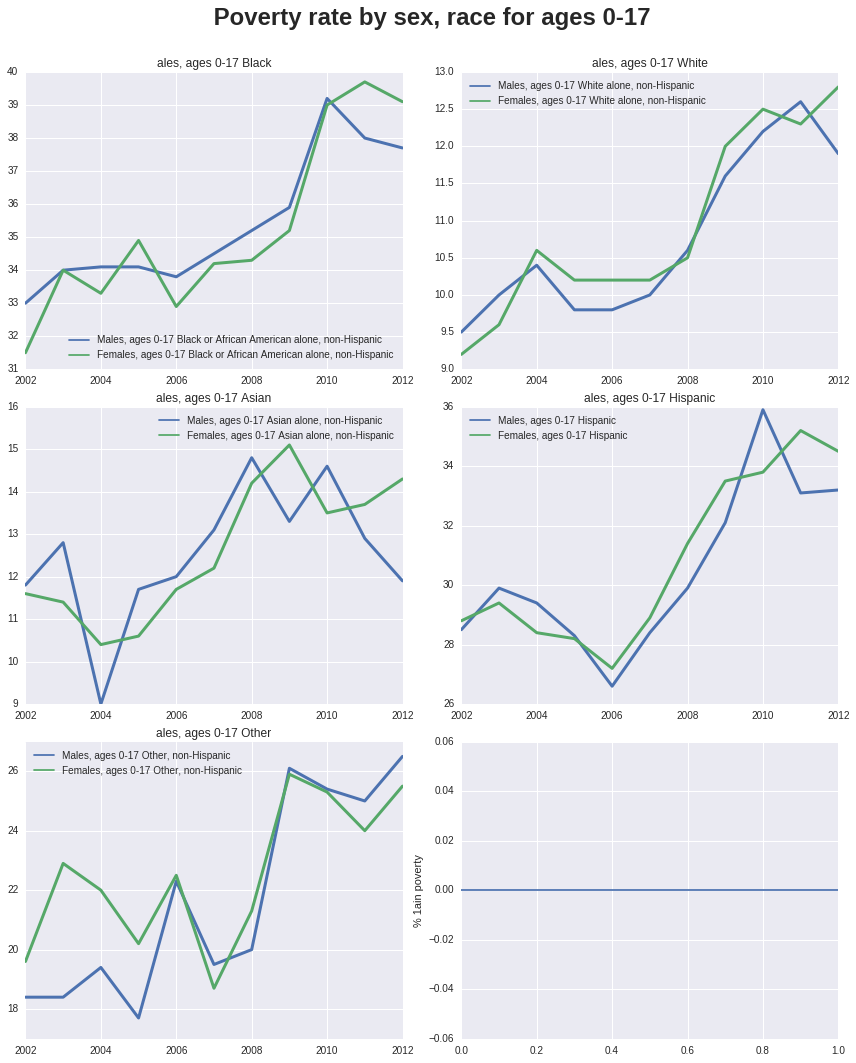

In [17]:
fig, ((ax11,ax12), (ax21,ax22), (ax31,ax32)) = \
                plt.subplots(nrows=3, ncols=2, figsize=(12,15))
#fig.tight_layout() # Or equivalently,  "plt.tight_layout()"
#fig.subplots_adjust(hspace=2.5)
fig.subplots_adjust(top=11)

_ = doem3('ales, ages 0-17 Black'    , ax11)
_ = doem3('ales, ages 0-17 White'    , ax12)
_ = doem3('ales, ages 0-17 Asian'    , ax21)
_ = doem3('ales, ages 0-17 Hispanic' , ax22)
_ = doem3('ales, ages 0-17 Other'    , ax31)
plot3_null(ax32)

fig.suptitle(" Poverty rate by sex, race for ages 0-17", 
             fontweight='bold', fontsize=24)


numrows=  6
numrows=  6
numrows=  6
numrows=  6
numrows=  6
numrows=  6


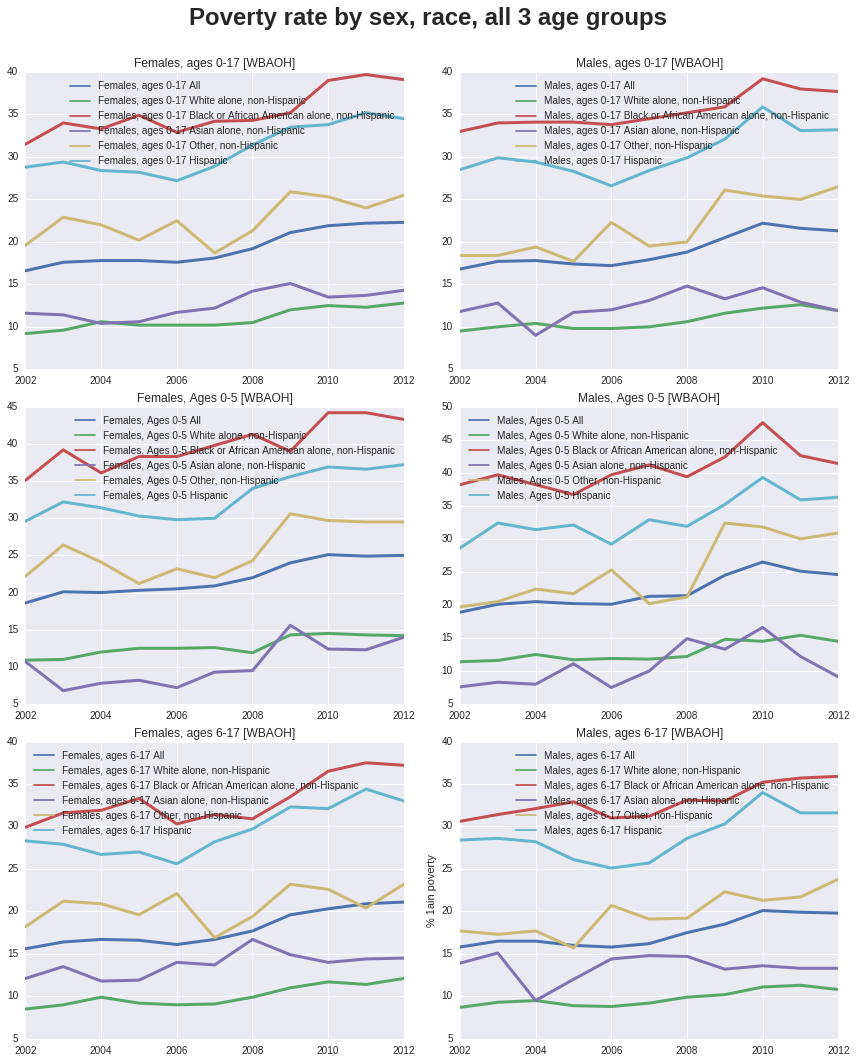

In [18]:
fig, ((ax11,ax12), (ax21,ax22), (ax31,ax32)) = \
                plt.subplots(nrows=3, ncols=2, figsize=(12,15))
#fig.tight_layout() # Or equivalently,  "plt.tight_layout()"
#fig.subplots_adjust(hspace=2.5)
fig.subplots_adjust(top=11)

_ = doem3('Females, ages 0-17 [WBAOH]', ax11)
_ = doem3('Males, ages 0-17 [WBAOH]'  , ax12)
_ = doem3('Females, Ages 0-5 [WBAOH]' , ax21)
_ = doem3('Males, Ages 0-5 [WBAOH]'   , ax22)
_ = doem3('Females, ages 6-17 [WBAOH]', ax31)
_ = doem3('Males, ages 6-17 [WBAOH]'  , ax32)

fig.suptitle("Poverty rate by sex, race, all 3 age groups", 
             fontweight='bold', fontsize=24)


In [19]:
#(df['chars'].unique())

#### Experiments and extras:

In [20]:
#filterem('Black')